# Regressão 01 - tarefa 02 - transformações em X e Y

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [7]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [8]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        17:45:03   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

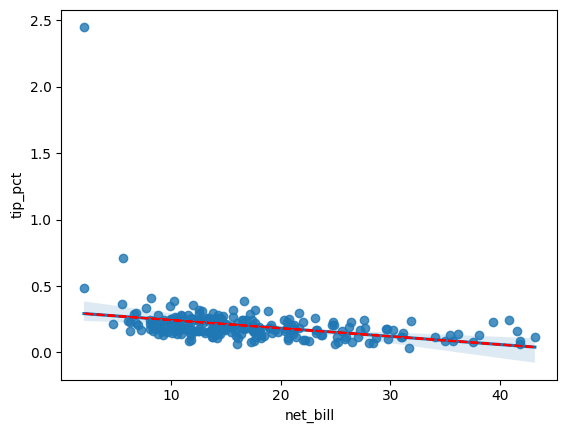

In [9]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [12]:
reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.62e-13
Time:                        17:45:03   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

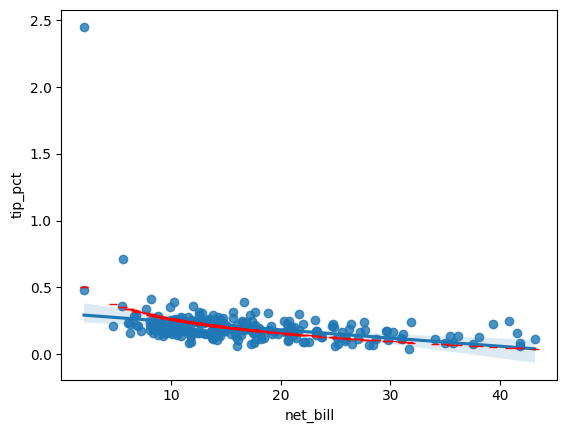

In [13]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)

plt.plot(tips['net_bill'], reg_log.fittedvalues, 'r', linestyle='None', marker='_')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [15]:
reg_power = smf.ols('tip_pct ~ np.power(net_bill,2)', data=tips).fit()
reg_power.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           0.000297
Time:                        17:45:03   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2388      0.014     16.725      0.000       0.211       0.267
np.power(net_bill, 2)    -0.0001   2.89e-05     -3.672      0.000      -0.000   -4.91e-05
==============================================================================
Omnibus:                      471.934   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242314.902
Skew:                          11.261   Prob(JB):                         0.00
Kurtosis:                     155.732   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

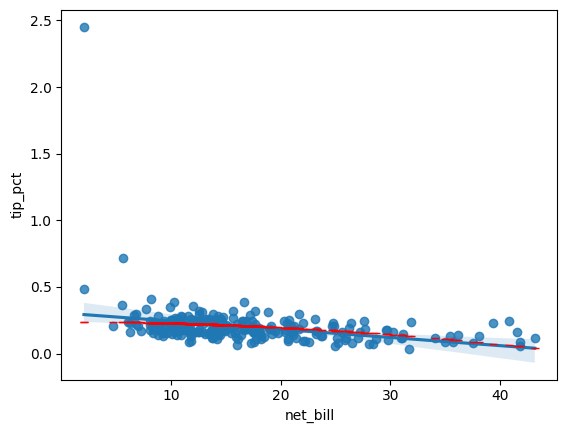

In [16]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg_power.fittedvalues, 'r', linestyle='None', marker='_')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [18]:
reg_log = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()

In [19]:
tips['pred_y'] = np.exp(reg_log.fittedvalues)

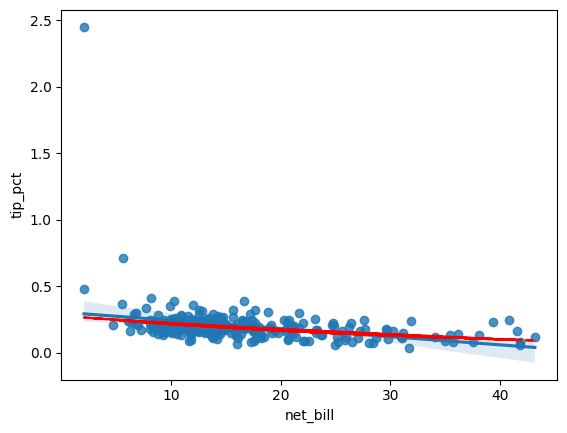

In [20]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')


In [21]:
tips[['pred_y','tip_pct']].corr().iloc[0,1]**2

0.1144098859252977

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [23]:
reg_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()


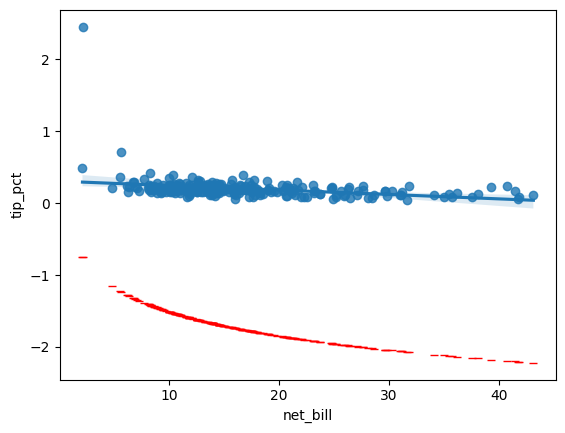

In [24]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg_log.fittedvalues, 'r', linestyle='None', marker='_')

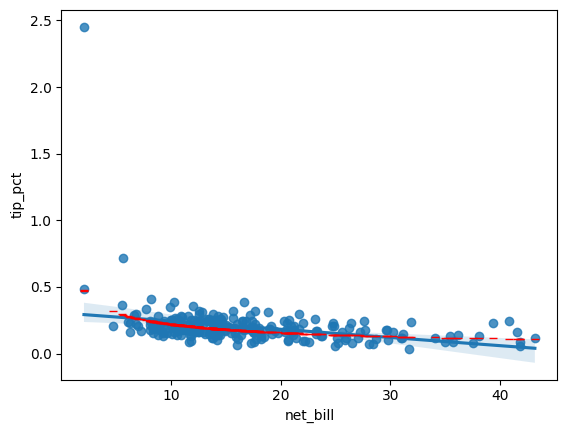

In [25]:
tips['pred_y'] = np.exp(reg_log.fittedvalues)
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_y'], 'r', linestyle='None', marker='_')

In [26]:
tips[['pred_y','tip_pct']].corr().iloc[0,1]**2

0.30894874740322276

###  6. qual modelo resultou no melhor ajuste?

In [28]:
O modelo que deu melhor resultado foi o 5, resultando em um R² de 0.3.

SyntaxError: invalid character '²' (U+00B2) (647417271.py, line 1)